In [1]:
import numpy as np

In [2]:
A = np.array([[0.6, 0.3, 0.1], [0.5, 0.3, 0.2], [0.2, 0.1, 0.7]])

In [7]:
A @ A ### @ is used for matrix multiplication 
## we do not use A * A for matrix multiplication

array([[0.53, 0.28, 0.19],
       [0.49, 0.26, 0.25],
       [0.31, 0.16, 0.53]])

In [8]:
np.eye(2)

array([[1., 0.],
       [0., 1.]])

In [11]:
def power(A, n):
    
    L = np.eye(3)
    for i in range(n+1):
        L = L @ A
    return L

In [79]:
power(A, 1000) #### This guy is called stationary dist.

array([[0.45238095, 0.23809524, 0.30952381],
       [0.45238095, 0.23809524, 0.30952381],
       [0.45238095, 0.23809524, 0.30952381]])

In [50]:
states = [0,1,2]
dict_ = {0:"Rainy", 1:"Cloudy", 2:"Sunny"}

In [39]:
np.random.choice(states, )

0

In [43]:
A[0] ### transition probabilities from state 0 to other states....

array([0.6, 0.3, 0.1])

In [44]:
def return_chain(length = 100, states = states, transition_probs = A):
    initial_state = np.random.choice(states)
    chain = [initial_state]
    for i in range(length):
        current_state = chain[-1]
        next_state = np.random.choice(states, p = transition_probs[current_state])        
        chain.append(next_state)
    return chain

In [92]:
chain = return_chain(6000000)[10000:]

In [84]:
np.bincount(chain) ### bincount function actually counts all occurencess and puts them into 3 bins.

array([2710824, 1427169, 1857008])

In [93]:
np.bincount(chain)/len(chain)

array([0.45227956, 0.23820564, 0.30951481])

In [95]:
import scipy
from scipy import stats
from matplotlib import pyplot as plt

In [102]:
dist = stats.rayleigh(loc = 0, scale = 1)

In [106]:
sample = dist.rvs(size = 100000)

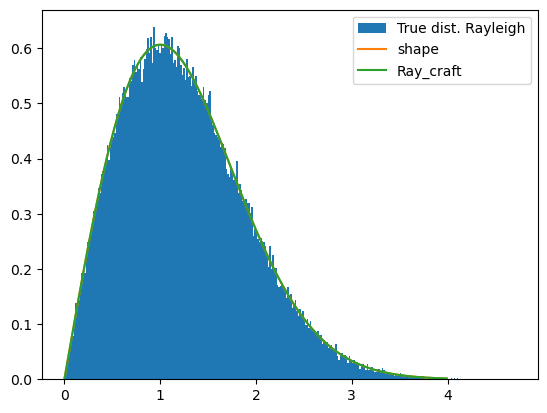

In [140]:
plt.hist(sample, density =True, bins = 300, label = "True dist. Rayleigh");
plt.plot(np.arange(0, 4, 0.01),[dist.pdf(i) for i in np.arange(0, 4, 0.01)], label = "shape")
plt.plot(np.arange(0, 4, 0.01),[f(i) for i in np.arange(0, 4, 0.01)], label = "Ray_craft")

plt.legend()
plt.show()

In [115]:
### For our proposal distribution we have the following choices
## 1) Chi^2
## 2) Gamma, (exponential family)
## 3) Even Normal distribution is acceptable

In [117]:
### Our aim is to come up with a Markov Chain {X_1, X_2, ..., X_n}
## Rayleigh
## σ = 2
f = lambda x: (x)*np.exp(-x**2/2)

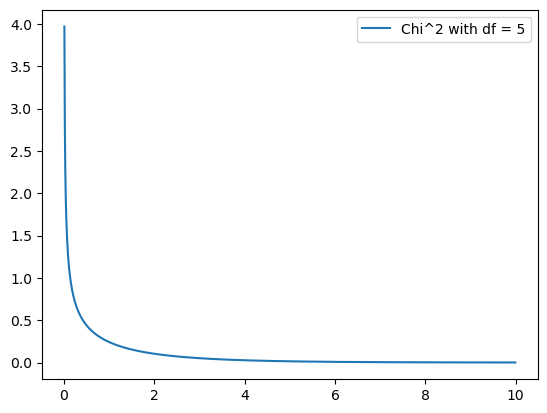

In [129]:
plt.plot(np.arange(0, 10, 0.01),[stats.chi2(1).pdf(i) for i in np.arange(0, 10, 0.01)], label = "Chi^2 with df = 5")
plt.legend()
plt.show()

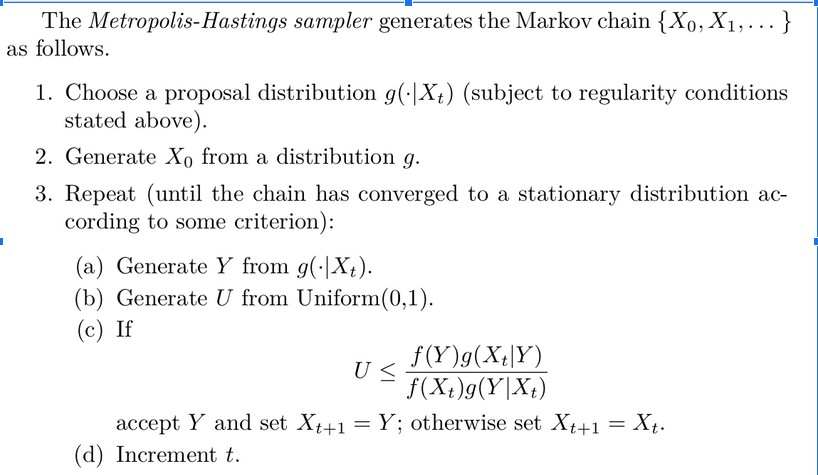

In [135]:
chain  = [1]
for i in range(100000):
    proposal_dist = stats.chi2(chain[-1])
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.chi2(Y).pdf(chain[-1]))/(f(chain[-1])*proposal_dist.pdf(Y))
    if U <=  ratio:
        chain.append(Y)

In [146]:
len(chain)/100000

0.34882

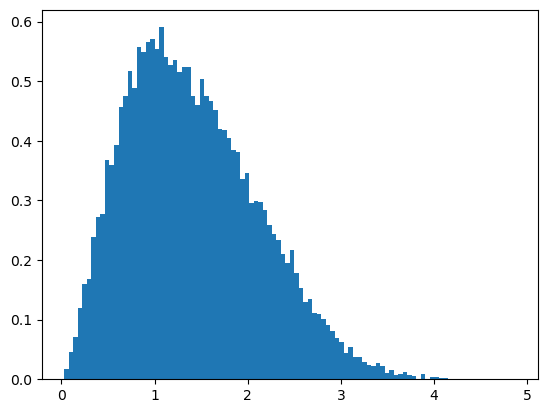

In [138]:
plt.hist(chain[500:], bins =100, density = True);

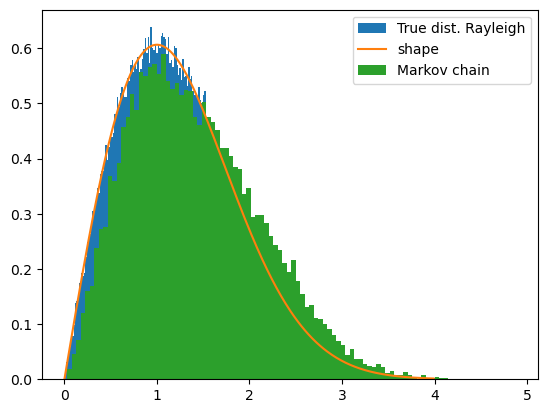

In [147]:
plt.hist(sample, density =True, bins = 300, label = "True dist. Rayleigh");
plt.plot(np.arange(0, 4, 0.01),[dist.pdf(i) for i in np.arange(0, 4, 0.01)], label = "shape")
plt.hist(chain[500:], bins =100, density = True, label = "Markov chain");
plt.legend()
plt.show()

In [163]:
import tqdm

In [164]:
from tqdm import tqdm

## Gamma as proposal distribution

In [165]:
chain  = [1]
for i in tqdm(range(10000000)):
    proposal_dist = stats.gamma(chain[-1])
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = (f(Y)*stats.gamma(Y).pdf(chain[-1]))/(f(chain[-1])*proposal_dist.pdf(Y))
    if U <=  ratio:
        chain.append(Y)

100%|███████████████████████████| 10000000/10000000 [2:20:35<00:00, 1185.46it/s]


In [162]:
len(chain)/10000000

0.47368

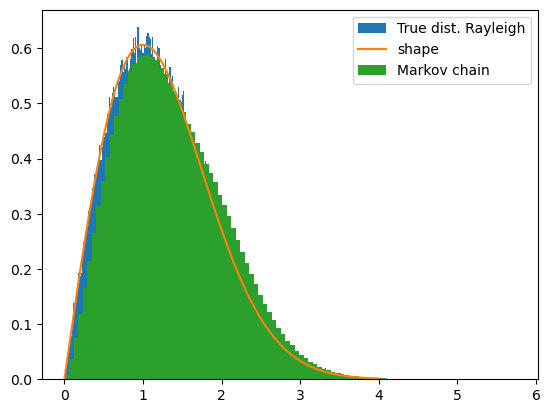

In [166]:
plt.hist(sample, density =True, bins = 300, label = "True dist. Rayleigh");
plt.plot(np.arange(0, 4, 0.01),[dist.pdf(i) for i in np.arange(0, 4, 0.01)], label = "shape")
plt.hist(chain[500:], bins =100, density = True, label = "Markov chain");
plt.legend()
plt.show()